In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
data = pd.read_csv('Clean_Data.csv')

In [5]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# Naive Bayes

In [9]:
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train, y_train)


GaussianNB()

# Random Forest

In [10]:
random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# SVM

In [11]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

svm_classifier = SVC(probability=True, random_state=42)

svm_classifier.fit(X_train1, y_train)

SVC(probability=True, random_state=42)

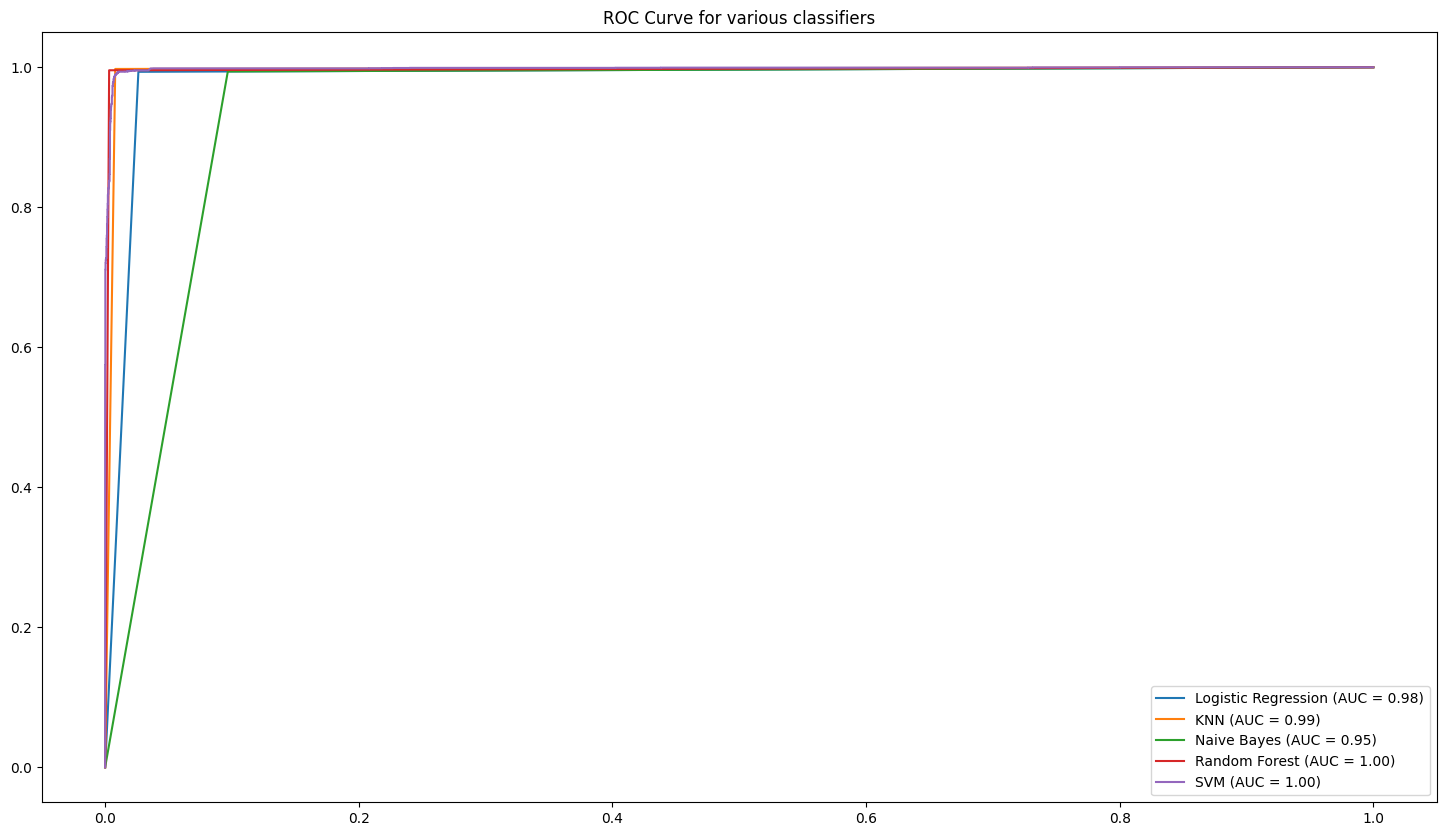

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_svm = svm_classifier.predict_proba(X_test1)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, lr.predict(X_test)) 
fpr2, tpr2, _ = roc_curve(y_test, knn.predict(X_test)) 
fpr3, tpr3, _ = roc_curve(y_test, gaussian_classifier.predict(X_test)) 
fpr4, tpr4, _ = roc_curve(y_test, random_forest_classifier.predict(X_test)) 
fpr5, tpr5, _ = roc_curve(y_test, y_prob_svm)

# Calculate AUC scores
auc1 = roc_auc_score(y_test, lr.predict(X_test))
auc2 = roc_auc_score(y_test, knn.predict(X_test))
auc3 = roc_auc_score(y_test, gaussian_classifier.predict(X_test))
auc4 = roc_auc_score(y_test, random_forest_classifier.predict(X_test))
auc5 = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(18, 10))
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'KNN (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Naive Bayes (AUC = {auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'Random Forest (AUC = {auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'SVM (AUC = {auc5:.2f})')

plt.title('ROC Curve for various classifiers')
plt.legend()
plt.show()
